In [8]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
a = "hello wandoo world!"
print(a)

hello wandoo world!


'<html lang="ko"><head>\n<link rel="styleSheet" href="/shop/data/skin/designgj/normalize.css?ver=1.22.0">\n<link rel="styleSheet" href="/shop/data/skin/designgj/common.css?ver=1.22.0">\n<link rel="styleSheet" href="/shop/data/skin/designgj/section1.css?ver=1.22.0">\n<script>\n        var GD_ISMEMBER = !!Number(\'0\');\n    </script>\n<script type="text/javascript" src="/shop/lib/js/jquery-1.10.2.min.js"></script>\n<script src="/shop/data/skin/designgj/common.js?ver=1.22.0"></script>\n<script type="text/javascript" src="//wcs.naver.net/wcslog.js"></script>\n<script type="text/javascript" src="/shop/lib/js/naverCommonInflowScript.js?Path=goods/goods_review_list.php&amp;Referer=&amp;AccountID=s_4f41b5625072&amp;Inflow=" id="naver-common-inflow-script"></script>\n<script type="text/javascript">\n        // 회원전용 & 로그인전\n        function popup_register(mode,goodsno,sno){\n            if ( mode == \'del_review\' ){\n                var win = window.open("goods_review_del.php?mode=" + mode + "
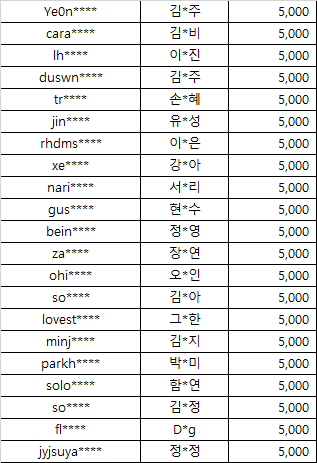

In [117]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from time import sleep

# create a new chrome session
# Chrome(chrome_options=options, ..로 하면
# chrome_options를 options로 바꾸라는 오류 표시됨
# DeprecationWarning: use options instead of chrome_options

options = Options()

driver = webdriver.Chrome(options=options, executable_path="/home/bitai/WDOP/proj_my/test_Wandoo_2/crawling_driver/chromedriver_linux64/chromedriver")
driver.maximize_window()


# Navigate to the application home page
# ./goods_review_list.php?goodsno=55222

# 메인 페이지 주소
# URL = 'https://www.kurly.com/shop/goods/goods_view.php?&goodsno=55222'

# 리뷰 페이지 주소
# 55222 38186 32309 7388 5765 40724 52606 5869 47724 40725
# URL = 'https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=&page={}'
# URL = 'https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=55222'
# URL = 'https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=55222&page={}'
URL = 'https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=40725&page={}'


# URL = 'http://deal.11st.co.kr/html/nc/deal/main.html'


driver.get(URL)

# 1.25초간 sleep
sleep(1.25)

# 리뷰 페이지 내용
page = driver.page_source
page

In [3]:
# 메인 페이지 - 제품명 추출
options = Options()

driver2 = webdriver.Chrome(options=options, executable_path="/home/bitai/WDOP/proj_my/test_Wandoo_2/crawling_driver/chromedriver_linux64/chromedriver")
driver2.maximize_window()

# 제품 페이지 주소
URL2 = 'https://www.kurly.com/shop/goods/goods_view.php?&goodsno=55222'


driver2.get(URL2)

# 1.25초간 sleep
sleep(1.25)


page2 = driver2.page_source
page2

'<html lang="ko"><head>\n<meta charset="euc-kr">\n<meta name="title" content="">\n<meta name="description" content=" :: 모두가 사랑하는 장보기, 마켓컬리! 당일 수확 채소, 과일, 맛집 음식까지 내일 아침 문 앞에서 만나요!">\n<meta property="og:title" content="마켓컬리 :: 내일의 장보기, 마켓컬리">\n<meta property="og:description" content="모두가 사랑하는 장보기, 마켓컬리! 당일 수확 채소, 과일, 맛집 음식까지 내일 아침 문 앞에서 만나요!">\n<meta property="og:image" content="https://res.kurly.com/images/marketkurly/logo/logo_sns_marketkurly.jpg">\n<meta property="og:url" content="https://www.kurly.com/shop/goods/goods_view.php?goodsno=55222">\n<meta property="og:type" content="website">\n<meta property="og:site_name" content="www.kurly.com">\n<meta name="keywords" content="다이어트, 식단, 닭가슴살, 요리, 치아바타, 레시피, 요리, 상차림, 다이어트음식, 이유식, 건강이유식">\n<title>마켓컬리 :: 내일의 장보기, 마켓컬리</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0">\n<meta name="naver-site-verification" content="58ff7c242d41178131208256

In [2]:
from bs4 import BeautifulSoup
from bs4.element import NavigableString

html = """
<div class="inner_view">
    <div class="name_purchase">
        [퀘스크렘] 블루치즈 크림치즈
    </div>
    <div class="review_photo"></div>
    진한 블루치즈 맛이네요    
</div>
"""

soup = BeautifulSoup(html, 'html.parser')
target_tag = soup.select_one('.inner_view')
print(target_tag.text)



        [퀘스크렘] 블루치즈 크림치즈
    

    진한 블루치즈 맛이네요    



In [45]:
soup = BeautifulSoup(html, 'html.parser')
target_tag = soup.select_one('.inner_view')

for bs_object in target_tag:
    print("[오브젝트]", type(bs_object))
    print("[대표형태]")
    print(bs_object)
    print("-----")

[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]


-----
[오브젝트] <class 'bs4.element.Tag'>
[대표형태]
<div class="name_purchase">
        [퀘스크렘] 블루치즈 크림치즈
    </div>
-----
[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]


-----
[오브젝트] <class 'bs4.element.Tag'>
[대표형태]
<div class="review_photo"></div>
-----
[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]

    진한 블루치즈 맛이네요    

-----


In [10]:
html = """
<div class="inner_view">
    <div class="name_purchase">
        [퀘스크렘] 블루치즈 크림치즈
    </div>
    <div class="review_photo"></div>
    진한 블루치즈 맛이네요    
</div>
"""

soup = BeautifulSoup(html, 'html.parser')
target_tag = soup.select_one('.inner_view')
target_text_without_child_tags = [
    bs_object
    for bs_object
    in target_tag
    if isinstance(bs_object, NavigableString)
]
text = "".join(target_text_without_child_tags)
print(text)




    진한 블루치즈 맛이네요    



<div class="inner_review">
<div class="name_purchase">
<strong class="name"></strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
<p class="MsoNormal">고객님 안녕하세요, 마켓컬리입니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal">■ Best 후기 당첨자 안내</p><p class="MsoNormal"><br/></p><p class="MsoNormal">[2020년 10월 19일 ~ 2020년 10월 25일]의 Best 후기 당첨자 공지드립니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal">정성껏 후기를 작성해주신 모든 고객님께 감사드립니다.<br/></p><p class="MsoNormal">Best 후기는 아래 게시판을 통해 확인 가능합니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal"><a href="http://www.kurly.com/shop/goods/goods_review_best.php">http://www.kurly.com/shop/goods/goods_review_best.php</a><br/></p><p class="MsoNormal"><br/>마켓컬리는 상품에 대한 고객 여러분의 생생한 의견을 듣고 더 나은 상품을 준비하기 위해 상품 후기 게시판을 운영하고 있습니다<span lang="EN-US">. </span><br/></p><p class="MsoNormal">실제로 상품의 후기가 구매 결정에 있어 큰 도움이 된 best 후기를 아래로 공유드립니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal"></p><br/><p class="MsoNormal"><span lang="EN-U
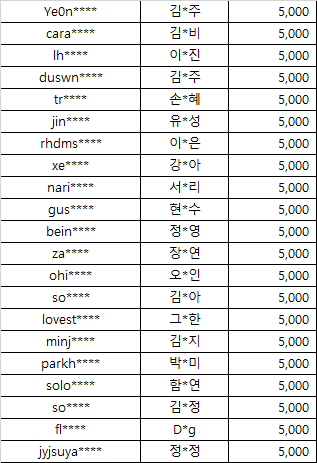

In [50]:
# 리뷰 1페이지에 마켓컬리 관리자가 작성한 공지가 2건 있다.
# 공지가 데이터 식별에 어려움을 주고 있어서 2페이지부터 진행할 예정.
# 1페이지의 내용을 출력해보았다.

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select_one('.inner_review')
print(target_tag)

In [4]:
# 2페이지 결과값
soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select('.inner_review')
print(target_tag)

[<div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
계속 재구매할것같아요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
진한 크림치즈를 먹고 싶다면추천<br/>
부드럽게 발리지는 않네요<br/>
그냥 얹어놓다시피 해서 먹어야해요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div

<div class="inner_review">
<div class="name_purchase">
<strong class="name"></strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
<p class="MsoNormal">고객님 안녕하세요, 마켓컬리입니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal">■ Best 후기 당첨자 안내</p><p class="MsoNormal"><br/></p><p class="MsoNormal">[2020년 10월 19일 ~ 2020년 10월 25일]의 Best 후기 당첨자 공지드립니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal">정성껏 후기를 작성해주신 모든 고객님께 감사드립니다.<br/></p><p class="MsoNormal">Best 후기는 아래 게시판을 통해 확인 가능합니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal"><a href="http://www.kurly.com/shop/goods/goods_review_best.php">http://www.kurly.com/shop/goods/goods_review_best.php</a><br/></p><p class="MsoNormal"><br/>마켓컬리는 상품에 대한 고객 여러분의 생생한 의견을 듣고 더 나은 상품을 준비하기 위해 상품 후기 게시판을 운영하고 있습니다<span lang="EN-US">. </span><br/></p><p class="MsoNormal">실제로 상품의 후기가 구매 결정에 있어 큰 도움이 된 best 후기를 아래로 공유드립니다.</p><p class="MsoNormal"><br/></p><p class="MsoNormal"></p><br/><p class="MsoNormal"><span lang="EN-U
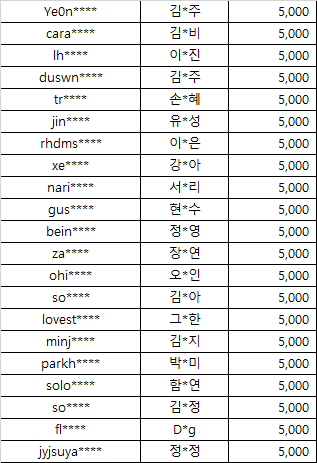

In [3]:
# 1단계

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select_one('.inner_review')

print(target_tag)

In [57]:
# 2단계

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select_one('.inner_review')

for bs_object in target_tag:
    
    print("[오브젝트]", type(bs_object))
    print("[대표형태]")
    print(bs_object)
    print("-----")

[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]


-----
[오브젝트] <class 'bs4.element.Tag'>
[대표형태]
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
-----
[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]


-----
[오브젝트] <class 'bs4.element.Tag'>
[대표형태]
<div class="review_photo"></div>
-----
[오브젝트] <class 'bs4.element.NavigableString'>
[대표형태]

많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^

-----


In [5]:
# 3단계

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select_one('.inner_review')

target_text_without_child_tags = [
    bs_object
    for bs_object in target_tag
        if isinstance(bs_object, NavigableString)
]

print(target_text_without_child_tags)

['\n', '\n', '\n', '\n']


In [48]:
# 3단계 - 복사 #깔피

soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select('.inner_review')



target_text_without_child_tags = [
    bs_object
    for bs_object in target_tag
        if isinstance(bs_object, NavigableString)
]
# text = "".join(target_text_without_child_tags)

# print(target_tag) - 7개 리뷰를 담고있는 태그가 나온다.
print(len(target_tag))
print(target_text_without_child_tags)
print("test=====" + text)


7
[]
test=====


많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^



In [70]:
# 깔피ㅇ
soup = BeautifulSoup(page, 'html.parser')
target_tag = soup.select('.inner_review')

list = []

for tags in target_tag:
    cont = ''
    for tag in tags:
        if isinstance(tag, NavigableString) and tag != "\n":
            cont += tag
    list.append(cont)

# text = "".join(target_text_without_child_tags)
print(list)

['', '', '\n크림치즈 좋네요.\n그간 먹은것과는 다릅니다.\n', '\n저렴한 가격에 많은 양 맛있는 맛 \n만족합니다\n', '\n진한 블루치즈 맛이네요\n', '\n블루치즈의 약간 꾸리함(?)이 좋네요\n', '\n정말 그 블루치즈 맛 강렬해요 ㅋㅋ\n']


In [31]:
for i in range(0, 3):
    for j in range(18, 20):
        print("Python wandoo(i-%d, j-%d)"%(i,j))

Python wandoo(i-0, j-18)
Python wandoo(i-0, j-19)
Python wandoo(i-1, j-18)
Python wandoo(i-1, j-19)
Python wandoo(i-2, j-18)
Python wandoo(i-2, j-19)


In [186]:
target_tag = soup.select('.inner_review')
print(target_tag)

[<div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
계속 재구매할것같아요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
진한 크림치즈를 먹고 싶다면추천<br/>
부드럽게 발리지는 않네요<br/>
그냥 얹어놓다시피 해서 먹어야해요
</div>, <div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div

In [159]:
target_tag

<div class="inner_review">
<div class="name_purchase">
<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>
<p class="package"></p>
</div>
<div class="review_photo"></div>
많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
</div>

In [333]:
review_detail_1dim = review_detail.pop(0)

review_detail_1dim

['\n\n[퀘스크렘] 블루치즈 크림치즈', '이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱\n']

In [304]:
review_detail.pop(2)

['\n\n[퀘스크렘] 블루치즈 크림치즈',
 '진한 크림치즈를 먹고 싶다면추천\n부드럽게 발리지는 않네요\n그냥 얹어놓다시피 해서 먹어야해요\n']

In [27]:
# 제품명
product_name = soup.select('.name')

product_name

[<strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>]

In [13]:
#리뷰 작성일
review_time = soup.select('.time')

review_time

[<td class="time">2020-10-27</td>,
 <td class="time">2020-10-26</td>,
 <td class="time">2020-10-25</td>,
 <td class="time">2020-10-25</td>,
 <td class="time">2020-10-24</td>,
 <td class="time">2020-10-24</td>,
 <td class="time">2020-10-24</td>]

In [47]:
# 리뷰 제목
review_title = soup.select('.fst')

review_title

[]

In [20]:
# 리뷰 제목 2 // 사용안함!!
# 리뷰에 이미지가 들어간 제목은 ""로 감싸져서 None으로 나온다(좋아요, "좋아요") 
review_all_title = soup.find_all('div', 'fst')

review_title = [soup.find_all('div', 'fst')[n].string for n in range(0, len(review_all_title))]


review_title

[None, '꿀이랑 너무 잘 어울림 ', '맛있어요 ', '제대로 치즈 ', '크림치즈 ', None, '블루치즈는 처음인데 ']

In [15]:
# 조회수
review_views = soup.select('.review-hit-cnt')

review_views

[<span class="review-hit-cnt" data-sno="18349573">1</span>,
 <span class="review-hit-cnt" data-sno="18327199">3</span>,
 <span class="review-hit-cnt" data-sno="18300508">6</span>,
 <span class="review-hit-cnt" data-sno="18268182">4</span>,
 <span class="review-hit-cnt" data-sno="18264661">2</span>,
 <span class="review-hit-cnt" data-sno="18263727">2</span>,
 <span class="review-hit-cnt" data-sno="18247566">1</span>]

In [301]:
review_views[i].text.split('<span')

type(review_views)

bs4.element.ResultSet

In [28]:
review_list = []

for i in range(0, len(target_tag)):
    review_row = []
    
    review_row.append(product_name[i].text.split('<div'))
    review_row.append(review_title[i].text.split('<div class="fst">'))
    
    #review_row.append(review_detail[])
    review_row.append(list[i])
    
    review_row.append(review_time[i].text.split('<td class="time">'))
    review_row.append(review_views[i].text.split('<span'))
    
    review_list.append(review_row)
    
review_list

[[['[퀘스크렘] 블루치즈 크림치즈'],
  ['고르곤졸라피자를 좋아하신다면! '],
  '\n아웃백의 블루치즈드레싱을 엄청 좋아하고 고르곤졸라피자도 좋아합니다. 그래서 혹시 그 꼬릿한 맛이 나는 치즈일까해서 구매해봤는데 맞네요!\n적당히 꼬릿해서 쉽게 먹을 수 있어요.\n크래커에 치즈올리고 꿀조금 뿌려서 먹으니 간단한 와인안주 탄생이네요!\n',
  ['2020-10-27'],
  ['1']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['치즈맛 찐해요 '],
  '\n꼬소한 치즈 냄새가 확 나요\n',
  ['2020-10-26'],
  ['3']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['좋아요 '],
  '\n많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^\n',
  ['2020-10-25'],
  ['6']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['꿀이랑 너무 잘 어울림 '],
  '\n이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱\n',
  ['2020-10-25'],
  ['4']],
 [['[퀘스크렘] 블루치즈 크림치즈'], ['맛있어요 '], '\n계속 재구매할것같아요\n', ['2020-10-24'], ['2']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['제대로 치즈 '],
  '\n진한 크림치즈를 먹고 싶다면추천\n부드럽게 발리지는 않네요\n그냥 얹어놓다시피 해서 먹어야해요\n',
  ['2020-10-24'],
  ['2']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['크림치즈 '],
  '\n꾸덕하니 정말 맛있어요 초딩입맛에도 잘 맞나봐요\n',
  ['2020-10-24'],
  ['1']]]

In [7]:
product_names = soup.select('.name')


product_names

[<strong class="name"></strong>,
 <strong class="name"></strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>,
 <strong class="name">[퀘스크렘] 블루치즈 크림치즈</strong>]

In [80]:
# 201030 금 14:48 해결 완료!!!

import time
import random

from urllib.request import urlopen
from bs4 import BeautifulSoup

#2~16page 까지만 진행(range 2,17)


# base_url = 'https://www.kurly.com/shop/goods/goods_view.php?&goodsno=49948&page={}'

review_list = []

# review_details = []

# for문 실행순서?
for n in range(1, 3):
    # print("==1" + url)
    url = URL.format(n+1)
    print("==2" + url)
    webpage = urlopen(url)
    
    driver.get(url)

    # 1.25초간 sleep
    # 리뷰 페이지 내용
    # page = driver.page_source
    
    soup = BeautifulSoup(webpage, 'html.parser')
    
    
    review_details = []
    
    
    # 제품명, 제조사
    product_names = soup.select('.name')
    review_titles = soup.select('.fst')    
    review_times = soup.select('.time')
    review_viewss = soup.select('.review-hit-cnt')
    # print(review_titles)
    # print("===1")
    
    # 리뷰 상세
    target_tag = soup.select('.inner_review')    
    
    
    for tags in target_tag:
        
        webpage = urlopen(url)
        driver.get(url)
        soup = BeautifulSoup(webpage, 'html.parser')             
        
        cont = ''
        for tag in tags:
            if isinstance(tag, NavigableString) and tag != "\n":
                cont = cont + tag
        
        #print("===tag")
        #print(tag)
        #print("===cont")
        #print(cont)
        review_details.append(cont)
        
        #print("===review details")
        #print(review_details)
        
        time.sleep(random.uniform(1, 1.1))

    for i in range(0, len(review_titles)):
        #print(review_title.get_text())
        review_row = []

        review_row.append(product_names[i].text.split('<div'))
        review_row.append(review_titles[i].text.split('<div'))

        # 리뷰 상세
        print("===222")
        review_row.append(review_details[i])

        review_row.append(review_times[i].text.split('<td'))        
        review_row.append(review_viewss[i].text.split('<span'))

        review_list.append(review_row)

        time.sleep(random.uniform(1, 1.1))
 

review_list
# print(len(target_tag))
#print("===target_tag")
#print(target_tag)

#print("===review_details")
#print(review_details)

==2https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=55222&page=2
===222
===222
===222
===222
===222
===222
===222
==2https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=55222&page=3
===222
===222
===222
===222
===222
===222
===222


[[['[퀘스크렘] 블루치즈 크림치즈'],
  ['고르곤졸라피자를 좋아하신다면! '],
  '\n아웃백의 블루치즈드레싱을 엄청 좋아하고 고르곤졸라피자도 좋아합니다. 그래서 혹시 그 꼬릿한 맛이 나는 치즈일까해서 구매해봤는데 맞네요!\n적당히 꼬릿해서 쉽게 먹을 수 있어요.\n크래커에 치즈올리고 꿀조금 뿌려서 먹으니 간단한 와인안주 탄생이네요!\n',
  ['2020-10-27'],
  ['4']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['치즈맛 찐해요 '],
  '\n꼬소한 치즈 냄새가 확 나요\n',
  ['2020-10-26'],
  ['4']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['좋아요 '],
  '\n많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^\n',
  ['2020-10-25'],
  ['7']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['꿀이랑 너무 잘 어울림 '],
  '\n이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱\n',
  ['2020-10-25'],
  ['5']],
 [['[퀘스크렘] 블루치즈 크림치즈'], ['맛있어요 '], '\n계속 재구매할것같아요\n', ['2020-10-24'], ['3']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['제대로 치즈 '],
  '\n진한 크림치즈를 먹고 싶다면추천\n부드럽게 발리지는 않네요\n그냥 얹어놓다시피 해서 먹어야해요\n',
  ['2020-10-24'],
  ['2']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['크림치즈 '],
  '\n꾸덕하니 정말 맛있어요 초딩입맛에도 잘 맞나봐요\n',
  ['2020-10-24'],
  ['3']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['연어베이글을 위해 '],
  '\n크림치즈 구입 했어요\n',
  ['2020-10-24'],
  ['4']],
 [['[퀘스크렘] 블루치즈 크림치즈'],
  ['블루치즈는 처음인데 '],
  '\n블루치즈는 처음 먹어보는데

In [118]:
# 얘는 데이터 뽑는 용도

import time
import random

from urllib.request import urlopen
from bs4 import BeautifulSoup

# 2~17page 까지만 진행(range 1,18)
# 17page(2~18p), 15page는 105개라 발생할 수 있는 더미 데이터까지 감안하면 애매해서 16page
# -> 17page로 진행(생각보다 이상 데이터가 많다)

review_list = []

# for문 실행순서?
for n in range(1, 18):
    # print("==1" + url)
    url = URL.format(n+1)
    print("==2" + url)
    webpage = urlopen(url)
    
    driver.get(url)
    
    soup = BeautifulSoup(webpage, 'html.parser')
    
    
    review_details = []
    
    
    # 제품명, 제조사
    product_names = soup.select('.name')
    review_titles = soup.select('.fst')    
    review_times = soup.select('.time')
    review_viewss = soup.select('.review-hit-cnt')
    # print(review_titles)
    # print("===1")
    
    # 리뷰 상세
    target_tag = soup.select('.inner_review')    
    
    
    for tags in target_tag:
        
        webpage = urlopen(url)
        driver.get(url)
        soup = BeautifulSoup(webpage, 'html.parser')             
        
        cont = ''
        for tag in tags:
            if isinstance(tag, NavigableString) and tag != "\n":
                cont = cont + tag

        review_details.append(cont)
        
        #print("===review details")
        #print(review_details)
        
        time.sleep(random.uniform(1, 1.1))

    for i in range(0, len(review_titles)):
        #print(review_title.get_text())
        review_row = []

        review_row.append(product_names[i].text.split('<div'))
        review_row.append(review_titles[i].text.split('<div'))

        # 리뷰 상세
        print("===222")
        review_row.append(review_details[i])

        review_row.append(review_times[i].text.split('<td'))        
        review_row.append(review_viewss[i].text.split('<span'))

        review_list.append(review_row)

        time.sleep(random.uniform(1, 1.1))
 

review_list

==2https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=40725&page=2
===222
===222
===222
===222
===222
===222
===222
==2https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=40725&page=3
===222
===222
===222
===222
===222
===222
===222
==2https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=40725&page=4
===222
===222
===222
===222
===222
===222
===222
==2https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=40725&page=5
===222
===222
===222
===222
===222
===222
===222
==2https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=40725&page=6
===222
===222
===222
===222
===222
===222
===222
==2https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=40725&page=7
===222
===222
===222
===222
===222
===222
===222
==2https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=40725&page=8
===222
===222
===222
===222
===222
===222
===222
==2https://www.kurly.com/shop/goods/goods_review_list.php?goodsno=40725&page=9
===222
===222
===222
===2

[[['[카스텔로] 덴마크 브리 치즈'],
  ['좋아요! '],
  '\n항상 주문하던거에요 할인일때 사서 저렴하게 잘산것 같아요~~\n',
  ['2020-10-30'],
  ['3']],
 [['[카스텔로] 덴마크 브리 치즈'], ['브리 '], '\n좋아서 재구매했어요\n', ['2020-10-30'], ['0']],
 [['[카스텔로] 덴마크 브리 치즈'],
  ['와인안주 '],
  '\n와인안주와 샌드위치로 활용하기 좋아요\n',
  ['2020-10-30'],
  ['2']],
 [['[카스텔로] 덴마크 브리 치즈'], ['와인안주로 '], '\n꿀발라 구울꺼에여 흐뭇\n', ['2020-10-30'], ['3']],
 [['[카스텔로] 덴마크 브리 치즈'],
  ['맛있어여 '],
  '\n후기보고 샀는데 사길 잘했네옹\n',
  ['2020-10-30'],
  ['3']],
 [['[카스텔로] 덴마크 브리 치즈'],
  ['재구매 '],
  '\n전갠적으로구워먹는건ㅜㅜ쫀득한식감이사라지고너무말랑거려비계녹인듯한식감이라\n비추에요ㅜ실온에미리꺼내놨다가먹음쫀득거리고꿀에찍어먹음쵝오입니당ㅎ\n',
  ['2020-10-30'],
  ['1']],
 [['[카스텔로] 덴마크 브리 치즈'],
  ['브리치즈로 고급스럽게 '],
  '\n브리치즈랑 통밀빵이랑 꿀 견과류 사과 이렇게 조합해서 먹으면 최고예요 \n다른 데보다 유난히 저렴하긱래 구매했어요\n',
  ['2020-10-30'],
  ['3']],
 [['[카스텔로] 덴마크 브리 치즈'],
  ['첫구매 대만족 '],
  '\n브리치즈 처음 먹어보는데 쫀득? 한 식감이 좋아요\n많이 안짜고 적당히 풍미있어서\n샌드위치용으로 딱입니다!\n',
  ['2020-10-30'],
  ['3']],
 [['[카스텔로] 덴마크 브리 치즈'],
  ['좋아요 '],
  '\n브리치즈 빵에넣고 녹여먹어요\n',
  ['2020-10-30'],
  ['0']],
 [['[카스텔로] 덴마크 브리 치즈'],
  ['와인안

In [119]:
# 수업때는 텍스트를 보냈지만 기능 보내는 것도 상관없다고 하심
# Flask 서버로 파이썬 컨트롤러와 스프링 컨트롤러가 통신할 수 있고
# 텍스트를 받던지 기능을 받던지는 문제가 되지 않는다.

# csv download(검색용 주석)
# csv(comma-separated values) 파일 다운로드하기

import csv

vid_csv_file = open("/home/bitai/WDOP/proj_my/test_Wandoo_2/crawling_driver/cheese2pic_real_part10.csv", "w", newline="")
vid_csv_writer = csv.writer(vid_csv_file)

# youtube_video_list(크롤링 데이터)를 vs_row에 넣고 돌린다.
# writerow 메소드로 vs_row를 csv 파일에 한줄씩 반복해서 넣는다.
for vs_row in review_list:
    vid_csv_writer.writerow(vs_row)
    
vid_csv_file.close()

In [129]:
print(review_product.text)

# 값이 안나옴

In [34]:
type(channel_name)

bs4.element.NavigableString

In [121]:
!head /home/bitai/WDOP/proj_my/test_Wandoo_2/crawling_driver/part_1~10/cheese2pic_real_part1.csv

['[퀘스크렘] 블루치즈 크림치즈'],['고르곤졸라피자를 좋아하신다면! '],"
아웃백의 블루치즈드레싱을 엄청 좋아하고 고르곤졸라피자도 좋아합니다. 그래서 혹시 그 꼬릿한 맛이 나는 치즈일까해서 구매해봤는데 맞네요!
적당히 꼬릿해서 쉽게 먹을 수 있어요.
크래커에 치즈올리고 꿀조금 뿌려서 먹으니 간단한 와인안주 탄생이네요!
",['2020-10-27'],['4']
['[퀘스크렘] 블루치즈 크림치즈'],['치즈맛 찐해요 '],"
꼬소한 치즈 냄새가 확 나요
",['2020-10-26'],['4']
['[퀘스크렘] 블루치즈 크림치즈'],['좋아요 '],"
많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^


In [190]:
import pandas as pd

cheese_data_frame = pd.read_csv(
    '/home/bitai/WDOP/proj_my3/cheese_review_crawl_python/dataset/cheese_review_for_analysis.csv',
    sep=','
)

In [146]:
df = df.replace('[', '', regex=True)

error: unterminated character set at position 0

In [154]:
df = df.replace("\n", "")

In [159]:
df = df.replace("['", "")

In [191]:
type(df)

pandas.core.frame.DataFrame

In [149]:
df['review_detail'].str.strip()

0      아웃백의 블루치즈드레싱을 엄청 좋아하고 고르곤졸라피자도 좋아합니다. 그래서 혹시 그...
1                                        꼬소한 치즈 냄새가 확 나요
2             많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^
3                                 이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱
4                                            계속 재구매할것같아요
                             ...                        
995                       과일과 샐러드 해먹어도 좋아요~ 발사믹과 잘 어울립니다
996                                    치즈 구워서 꿀이랑 견과류 짱맛
997                                          와인안주로구매해밧어용
998                       브리치즈 샌드위치 만드려고 샀어요 \n맛있었음 좋겠어요
999    짭쪼름하고 냄새 안나서 좋아요\n150도 예열 후 5분 땡 하면 너무 맛있게 구워집...
Name: review_detail, Length: 1000, dtype: object

In [151]:
cheese_data_frame

,category,brand_name,product_name,review_title,review_detail,review_date,review_views
0,크림,퀘스크렘,블루치즈 크림치즈,['고르곤졸라피자를 좋아하신다면! '],\n아웃백의 블루치즈드레싱을 엄청 좋아하고 고르곤졸라피자도 좋아합니다. 그래서 혹시...,['2020-10-27'],['4']
1,크림,퀘스크렘,블루치즈 크림치즈,['치즈맛 찐해요 '],\n꼬소한 치즈 냄새가 확 나요\n,['2020-10-26'],['4']
2,크림,퀘스크렘,블루치즈 크림치즈,['좋아요 '],\n많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^\n,['2020-10-25'],['7']
3,크림,퀘스크렘,블루치즈 크림치즈,['꿀이랑 너무 잘 어울림 '],\n이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱\n,['2020-10-25'],['5']
4,크림,퀘스크렘,블루치즈 크림치즈,['맛있어요 '],\n계속 재구매할것같아요\n,['2020-10-24'],['3']
...,...,...,...,...,...,...,...
995,브리,카스텔로,덴마크 브리 치즈,['샐러드용 '],\n과일과 샐러드 해먹어도 좋아요~ 발사믹과 잘 어울립니다\n,['2020-10-25'],['1']
996,브리,카스텔로,덴마크 브리 치즈,['브리 '],\n치즈 구워서 꿀이랑 견과류 짱맛\n,['2020-10-25'],['3']
997,브리,카스텔로,덴마크 브리 치즈,['첫구매 '],\n와인안주로구매해밧어용\n,['2020-10-24'],['0']
998,브리,카스텔로,덴마크 브리 치즈,['브리치즈 '],\n브리치즈 샌드위치 만드려고 샀어요 \n맛있었음 좋겠어요\n,['2020-10-24'],['1']


In [147]:
cheese_data_frame.head(10)

,category,brand_name,product_name,review_title,review_detail,review_date,review_views
0,크림,퀘스크렘,블루치즈 크림치즈,['고르곤졸라피자를 좋아하신다면! '],\n아웃백의 블루치즈드레싱을 엄청 좋아하고 고르곤졸라피자도 좋아합니다. 그래서 혹시...,['2020-10-27'],['4']
1,크림,퀘스크렘,블루치즈 크림치즈,['치즈맛 찐해요 '],\n꼬소한 치즈 냄새가 확 나요\n,['2020-10-26'],['4']
2,크림,퀘스크렘,블루치즈 크림치즈,['좋아요 '],\n많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^\n,['2020-10-25'],['7']
3,크림,퀘스크렘,블루치즈 크림치즈,['꿀이랑 너무 잘 어울림 '],\n이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱\n,['2020-10-25'],['5']
4,크림,퀘스크렘,블루치즈 크림치즈,['맛있어요 '],\n계속 재구매할것같아요\n,['2020-10-24'],['3']
5,크림,퀘스크렘,블루치즈 크림치즈,['제대로 치즈 '],\n진한 크림치즈를 먹고 싶다면추천\n부드럽게 발리지는 않네요\n그냥 얹어놓다시피 ...,['2020-10-24'],['2']
6,크림,퀘스크렘,블루치즈 크림치즈,['크림치즈 '],\n꾸덕하니 정말 맛있어요 초딩입맛에도 잘 맞나봐요\n,['2020-10-24'],['3']
7,크림,퀘스크렘,블루치즈 크림치즈,['연어베이글을 위해 '],\n크림치즈 구입 했어요\n,['2020-10-24'],['4']
8,크림,퀘스크렘,블루치즈 크림치즈,['블루치즈는 처음인데 '],\n블루치즈는 처음 먹어보는데 특유의 콤콤한 맛이 참 맛있네요. 제 취향입니다. 그...,['2020-10-23'],['4']
9,크림,퀘스크렘,블루치즈 크림치즈,['적당적당 '],\n그냥 발라먹기 적당. 쿰쿰한 냄새가 많이 나진 않은데 그렇다고 맛있지도 않음...\n,['2020-10-21'],['3']


In [144]:
cheese_data_frame.shape

(1000, 7)

In [130]:
cheese_data_frame.dtypes

category         object
brand_name       object
product_name     object
review_title     object
review_detail    object
review_date      object
review_views     object
dtype: object

In [164]:
cheese_data_frame.조회수.dtypes

dtype('float64')

In [192]:
df = pd.DataFrame(cheese_data_frame)

In [137]:
df = df.replace('\n', '', regex=True)

In [204]:
df['review_title'].str.strip()

0      고르곤졸라피자를 좋아하신다면!
1               치즈맛 찐해요
2                   좋아요
3          꿀이랑 너무 잘 어울림
4                  맛있어요
             ...       
995                샐러드용
996                  브리
997                 첫구매
998                브리치즈
999         다들 추천하는 이유가
Name: review_title, Length: 1000, dtype: object

In [212]:
split = df['review_views'].str.split("[")
df['review_views'] = split.str.get(1)

split

0      [, '4']]
1      [, '4']]
2      [, '7']]
3      [, '5']]
4      [, '3']]
         ...   
995    [, '1']]
996    [, '3']]
997    [, '0']]
998    [, '1']]
999    [, '3']]
Name: review_views, Length: 1000, dtype: object

In [213]:
split = df['review_views'].str.split("]")
df['review_views'] = split.str.get(0)

split

0      ['4', ]
1      ['4', ]
2      ['7', ]
3      ['5', ]
4      ['3', ]
        ...   
995    ['1', ]
996    ['3', ]
997    ['0', ]
998    ['1', ]
999    ['3', ]
Name: review_views, Length: 1000, dtype: object

In [214]:
split = df['review_views'].str.split("'")
df['review_views'] = split.str.get(1)

split

0      [, 4, ]
1      [, 4, ]
2      [, 7, ]
3      [, 5, ]
4      [, 3, ]
        ...   
995    [, 1, ]
996    [, 3, ]
997    [, 0, ]
998    [, 1, ]
999    [, 3, ]
Name: review_views, Length: 1000, dtype: object

In [206]:
split = df['review_detail'].str.split("\n")
df['review_detail'] = split.str.get(1)

split

0      [, 아웃백의 블루치즈드레싱을 엄청 좋아하고 고르곤졸라피자도 좋아합니다. 그래서 혹...
1                                  [, 꼬소한 치즈 냄새가 확 나요, ]
2       [, 많이 꼬릿꼬릿(?)하진 않아요~적당히 즐길수 있는 불루 치즈 맛입니다~~^^, ]
3                           [, 이것만 먹으면 꼬릿한데 꿀 넣으면 존맛탱, ]
4                                      [, 계속 재구매할것같아요, ]
                             ...                        
995                 [, 과일과 샐러드 해먹어도 좋아요~ 발사믹과 잘 어울립니다, ]
996                              [, 치즈 구워서 꿀이랑 견과류 짱맛, ]
997                                    [, 와인안주로구매해밧어용, ]
998                 [, 브리치즈 샌드위치 만드려고 샀어요 , 맛있었음 좋겠어요, ]
999    [, 짭쪼름하고 냄새 안나서 좋아요, 150도 예열 후 5분 땡 하면 너무 맛있게 ...
Name: review_detail, Length: 1000, dtype: object

In [189]:
df.insert(4, 'review_title', df2['review_title'])

ValueError: cannot insert review_title, already exists

In [178]:
# csv 파일로 저장하기
cheese_data_frame.to_csv('cheese_EMP.csv')

In [216]:
df.to_csv('cheese_review_panda.csv')

In [179]:
# csv 파일 구분자 쉼표(,)로 되있던 것 세미콜론(;)으로 바꾸기
with open('cheese_review_for_analysis.csv', 'r', encoding='utf-8') as f_in, open("cheese_convert_file", 'w') as f_out:
    for line in f_in:
        line = line.split(",")
        line = ";".join(line)
        f_out.write(line)

In [180]:
# 번호 컬럼 삭제하기
# axis = 1 은 열로 제거, axis = 0은 행으로 제거
feats = cheese_data_frame.drop('번호', axis = 1)

In [182]:
# 번호 컬럼 제거 후 df 조회
feats

,제품명,후기 제목,후기 상세,작성일,조회수
0,[퀘스크렘] 블루치즈 크림치즈,맛있어요,크림치즈는 사랑입니다,2020-10-19,2.0
1,[퀘스크렘] 블루치즈 크림치즈,만족합니다.,잘 숙성된 치즈의 향입니다.,2020-10-17,2.0
2,[퀘스크렘] 블루치즈 크림치즈,무난,블루치즈 잘 못먹는 분들도 드실 수 있을 것 같아요,2020-10-15,6.0
3,[퀘스크렘] 블루치즈 크림치즈,짱짱,재구매 의사 백프로입니다. 달지않고 짜지도 않은 데일리로 즐기기 좋은 깊이감있는 맛...,2020-10-15,5.0
4,[퀘스크렘] 블루치즈 크림치즈,베이글에,발라 먹어보려구요 ㅎㅎ,2020-10-15,17.0
...,...,...,...,...,...
140,[포인트 레이스] 오리지널 블루,좋아요,"아빠가 항상 두고 드시는 블루치즈! 컬리에서 파는 프랑스,미국 블루치즈 둘다 보내드...",2020-08-23,10.0
141,[포인트 레이스] 오리지널 블루,블루,오리지널 블루치즈 쪼아요,2020-08-04,18.0
142,[포인트 레이스] 오리지널 블루,입이 즐거운,블루치즈 진하고 풍미가 있어 맛있게 잘먹었어요~!,2020-08-04,42.0
143,[포인트 레이스] 오리지널 블루,샐러드에 빵에,포인트로 조금씩 얹어 먹어요,2020-08-02,41.0


In [186]:
# 번호 컬럼 제거한 df를 csv로 저장하기

feats.to_csv('cheese_EMP_2.csv')

In [187]:
# csv 파일 구분자 쉼표(,)로 되있던 것 세미콜론(;)으로 바꾸기
with open('cheese_EMP_2.csv', 'r', encoding='utf-8') as f_in, open("cheese_EMP_2_convert.csv", 'w') as f_out:
    for line in f_in:
        line = line.split(",")
        line = ";".join(line)
        f_out.write(line)

In [ ]:
========================================== 아래로는 예전에 작성했던 코드 ==========================================

In [61]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [64]:
# mysql로 DB 만들기
# video_crawl_db의 테이블

CREATE TABLE video_crawl_table(
    `youtube_no` INT NOT NULL AUTO_INCREMENT, # PK
    `youtuber_name` VARCHAR(80),
    `youtube_title` VARCHAR(100),
    `youtube_play_time` VARCHAR(30),
    `subscribe_num` VARCHAR(100),
    `views_num` VARCHAR(100),
    `upload_time` VARCHAR(80),
    `crawling_time` VARCHAR(80),
    `youtube_link` VARCHAR(100),
    PRIMARY KEY(youtube_no)
) CHARSET = utf8;

SyntaxError: invalid syntax (<ipython-input-64-22b3bee365f7>, line 3)

In [ ]:
# 크롤링 영문 단어 입력시 오타 주의

In [ ]:
========================================== bye bye ==========================================

In [22]:
# not enough arguments for format string 오류로
# 고통받다가 성공한 mysql insert 코드

import pymysql

connect = pymysql.connect(host='localhost', user='bitai', password='456123', db='testdb', charset='utf8mb4')
cursor = connect.cursor()

for r in youtube_video_list:
    youtuber_name = str(r[0])
    youtube_title = str(r[1])
    youtube_play_time = str(r[2])
    subscribe_num = str(r[3])
    views_num = str(r[4])
    upload_time = str(r[5])
    crawling_time = str(r[6])
    youtube_link = str(r[7])
    
    sql = """insert into video_crawl_table
    (
    
    youtuber_name, 
    youtube_title, 
    youtube_play_time, 
    subscribe_num, 
    views_num, 
    upload_time, 
    crawling_time, 
    youtube_link
    
    ) 
    
    values ('%s', '%s', '%s', '%s', '%s', '%s', '%s', '%s')
    """ % (youtuber_name, youtube_title, youtube_play_time, subscribe_num, views_num, upload_time, crawling_time, youtube_link)
    
    cursor.execute(sql)
    connect.commit()
    
connect.close()

In [110]:
# testtesttesttesttesttesttesttest